In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import math
from datetime import date, datetime, timezone
import missingno as msno

In [2]:
plt.style.use('ggplot')
sns.set_context('notebook')
sns.set_style('ticks')

# **Basic DateTime Analysis**

In [3]:
dob = date(1959, 3, 28)

In [4]:
dobs = [date(1959, 3, 28), date(1963, 6, 2), date(1997, 12, 5)]
dobs[0].year, dobs[1].month, dobs[2].day, dobs[0].weekday() # 0: monday, ..., 6:sunday

(1959, 6, 5, 5)

In [5]:
(dobs[1]-dobs[0]).days

1527

strftime: Converting datetime to strings  
strptime: Converting strings with date to datetime


In [6]:
dobs[0].strftime('%m/%d/%Y'), dobs[0].strftime('%B (%Y)'), dobs[0].strftime('%Y-%j')

('03/28/1959', 'March (1959)', '1959-087')

In [7]:
dad = datetime(1959, 3, 28, 17, 25, 11)
print(dad)

1959-03-28 17:25:11


In [8]:
dad = dad.replace(day=27, hour=18)
print(dad)

1959-03-27 18:25:11


In [9]:
gap = max(dobs) - min(dobs)
gap.total_seconds(), gap.days

(1221004800.0, 14132)

In [10]:
from dateutil import tz
et = tz.gettz('Americal/Washington D.C.')
ko = tz.gettz('Asia/Seoul')
dad = datetime(1959, 3, 28, 17, 25, 11, tzinfo=et)
dad_ko = dad.astimezone(tz=ko)
print(dad)
print(dad_ko)

1959-03-28 17:25:11
1959-03-29 01:55:11+08:30


Importing the dataset and obtaining a basic information

In [11]:
traffic_violations_MC = pd.read_csv('traffic_violations_MC_10%.csv')
traffic_violations_MC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129240 entries, 0 to 129239
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               129240 non-null  int64  
 1   Date Of Stop             129240 non-null  object 
 2   Time Of Stop             129240 non-null  object 
 3   Agency                   129240 non-null  object 
 4   SubAgency                129237 non-null  object 
 5   Description              129238 non-null  object 
 6   Location                 129240 non-null  object 
 7   Latitude                 119581 non-null  float64
 8   Longitude                119581 non-null  float64
 9   Accident                 129240 non-null  object 
 10  Belts                    129240 non-null  object 
 11  Personal Injury          129240 non-null  object 
 12  Property Damage          129240 non-null  object 
 13  Fatal                    129240 non-null  object 
 14  Comm

Showing the missing values in a matrix

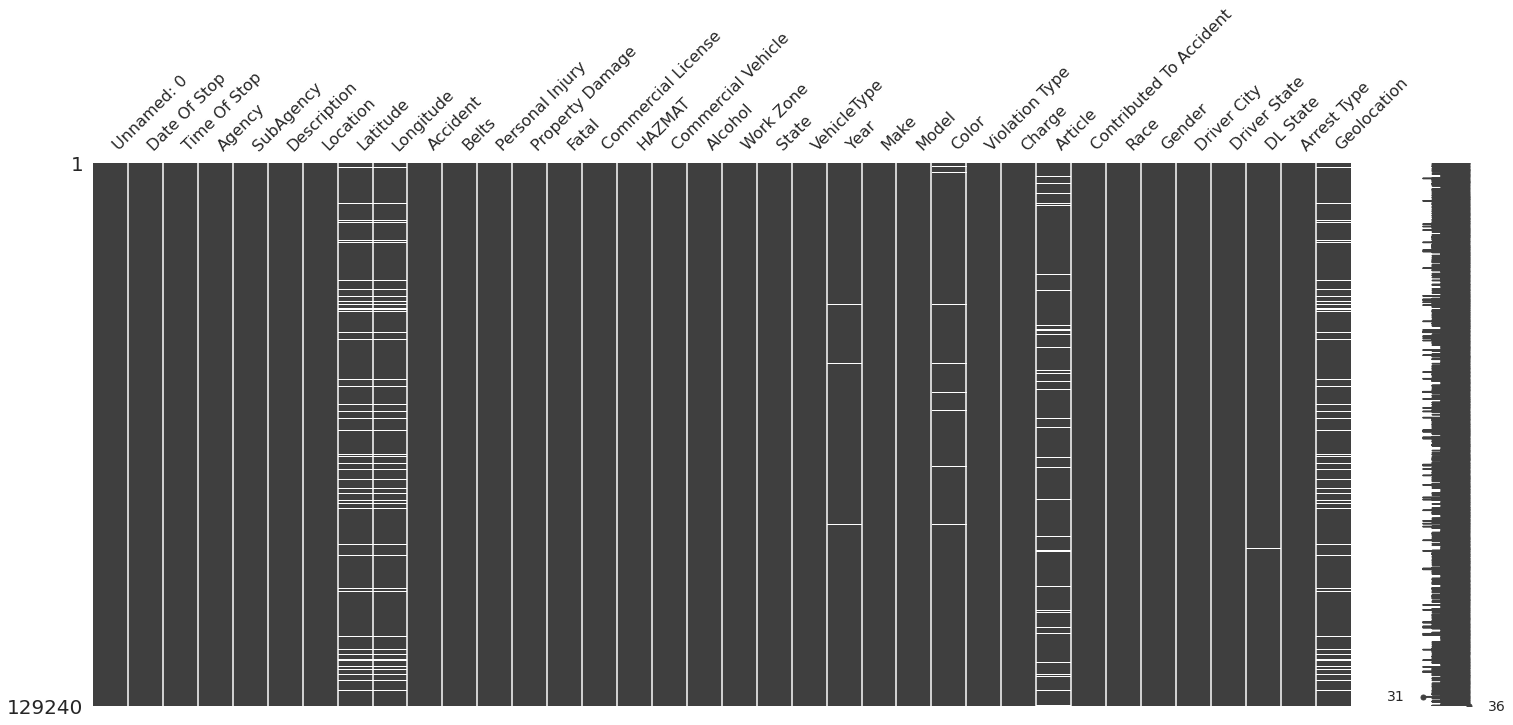

In [12]:
msno.matrix(traffic_violations_MC)
plt.show()

# **Indexing DateTime**

In [13]:
df_index = traffic_violations_MC.copy()

Combining Date and Time and then Converting the result into a datetime type

In [14]:
df_index['Date Of Stop'].str.replace('/', '-')

0         11-15-2013
1         12-27-2015
2         09-18-2012
3         07-08-2014
4         04-23-2014
             ...    
129235    11-14-2013
129236    04-04-2015
129237    06-19-2015
129238    12-02-2015
129239    12-29-2013
Name: Date Of Stop, Length: 129240, dtype: object

In [15]:
df_index['DateTime'] = df_index['Date Of Stop'].str.cat(df_index['Time Of Stop'], sep=' ')

In [16]:
df_index['DateTime'] = pd.to_datetime(df_index['DateTime'])

Setting the index by 'DateTime'

In [17]:
df_index.set_index('DateTime', inplace=True)

Grouping by Year in Index: No need to call dt

In [18]:
df_index.groupby(df_index.index.year)['Race'].value_counts()

DateTime  Race           
2012      WHITE              6216
          BLACK              4508
          HISPANIC           2740
          ASIAN               863
          OTHER               765
          NATIVE AMERICAN       3
2013      WHITE              7122
          BLACK              5836
          HISPANIC           3738
          ASIAN              1133
          OTHER               946
          NATIVE AMERICAN      36
2014      WHITE              8596
          BLACK              6557
          HISPANIC           4490
          ASIAN              1368
          OTHER              1161
          NATIVE AMERICAN      84
2015      WHITE              8461
          BLACK              7393
          HISPANIC           5182
          ASIAN              1392
          OTHER              1206
          NATIVE AMERICAN      78
2016      WHITE              7255
          BLACK              7060
          HISPANIC           5078
          ASIAN              1269
          OTHER       

In [19]:
# not working for counting, but working for numerical statistics
#df_index['Race'].resample('Y').value_counts()

# **Parsing DateTime**

Converting the objects Date/Time Of Stop as datetime

In [20]:
traffic_violations = pd.read_csv('traffic_violations_MC_10%.csv', parse_dates=['Date Of Stop'])
# may use pd.to_datetime
#traffic_violations.info()

Chekcing the number of agencies

In [21]:
traffic_violations['Agency'].unique()

array(['MCP'], dtype=object)

Dropping columns that are not interesting and then renaming the dataset by "df"

In [22]:
df_parse = traffic_violations.drop(traffic_violations.columns[[0, 3, 4, 5, 6, 7, 8, 14, 15, 16, 18, 19, 20, 
                                                               21, 22, 23, 24,  26, 27, 33, 34, 35]], axis=1)
#df.info()

Resampling (grouping) by Year on 'Date Of Stop' and counting the number of each race in the year

In [23]:
df_parse.resample('Y', on='Date Of Stop')['Race'].value_counts()

Date Of Stop  Race           
2012-12-31    WHITE              6216
              BLACK              4508
              HISPANIC           2740
              ASIAN               863
              OTHER               765
              NATIVE AMERICAN       3
2013-12-31    WHITE              7122
              BLACK              5836
              HISPANIC           3738
              ASIAN              1133
              OTHER               946
              NATIVE AMERICAN      36
2014-12-31    WHITE              8596
              BLACK              6557
              HISPANIC           4490
              ASIAN              1368
              OTHER              1161
              NATIVE AMERICAN      84
2015-12-31    WHITE              8461
              BLACK              7393
              HISPANIC           5182
              ASIAN              1392
              OTHER              1206
              NATIVE AMERICAN      78
2016-12-31    WHITE              7255
              BLACK 

Extracting years and months from "Date Of Stop" and hours from "Time Of Stop"

In [24]:
df_parse['year'] = df_parse['Date Of Stop'].dt.year # after parsing datetime
df_parse['month'] = df_parse['Date Of Stop'].dt.month
df_parse['weekday'] = df_parse['Date Of Stop'].dt.weekday # 0: Monday, ..., 6: Sunday
df_parse['hour'] = pd.to_datetime(traffic_violations['Time Of Stop']).dt.hour  # without parsing datetime

Arranging "year", "month" and "hour" to the first three columns

In [25]:
Year = df_parse['year']
Month = df_parse['month']
Hour = df_parse['hour']
Weekday = df_parse['weekday']
df_parse = df_parse.drop(['year', 'month', 'hour', 'weekday'], axis=1)

In [26]:
df_parse.insert(0, 'year', Year)
df_parse.insert(1, 'month', Month)
df_parse.insert(2, 'hour', Hour)
df_parse.insert(3, 'weekday', Weekday)

Sorting the data by "year", "month" and "hour" in ascending order

In [27]:
df_parse = df_parse.sort_values(['year', 'month', 'hour'])

Checking and dropping misssing values

In [28]:
df_parse.isnull().sum()
df_parse.dropna(inplace=True)

Same as resampling above

In [29]:
df_parse.groupby('year')['Race'].value_counts()

year  Race           
2012  WHITE              6216
      BLACK              4507
      HISPANIC           2740
      ASIAN               863
      OTHER               763
      NATIVE AMERICAN       3
2013  WHITE              7122
      BLACK              5836
      HISPANIC           3738
      ASIAN              1133
      OTHER               946
      NATIVE AMERICAN      36
2014  WHITE              8596
      BLACK              6557
      HISPANIC           4490
      ASIAN              1368
      OTHER              1158
      NATIVE AMERICAN      84
2015  WHITE              8460
      BLACK              7391
      HISPANIC           5181
      ASIAN              1392
      OTHER              1204
      NATIVE AMERICAN      78
2016  WHITE              7255
      BLACK              7058
      HISPANIC           5076
      ASIAN              1269
      OTHER              1208
      NATIVE AMERICAN      45
2017  BLACK              6551
      WHITE              6457
      HISPANIC    